### Final Project Submission
+ Please fill out:
+ Student name: Bahati Gatavi Ndwiga
+ Student pace: Part-time
+ Scheduled project review date/time: 19th April 2023
+ Instructor name:
+ Blog post URL:

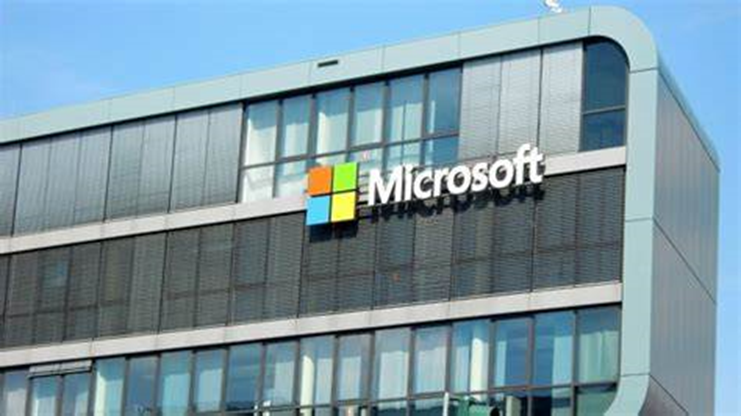

#### PROJECT OVERVIEW

+ Microsoft has decided to enter the movie industry by establishing a new movie studio. Nevertheless, they lack experience in the industry of entertainment, so as to produce high-quality, original movies that appeal to a wide audience.

#### PROBLEM STATEMENT

+ Microsoft lacks experience in the entertainment industry, and this presents a significant challenge in creating a successful movie studio. The company needs to identify the right talent, create a business plan, and establish relationships with distributors and other stakeholders to produce and distribute high-quality, original movies. Furthermore, they need to ensure that the movies appeal to a wide audience and generate revenue for the company. The lack of expertise in this area could result in the production of low-quality movies that fail to generate revenue, which could negatively impact the company's reputation and financial performance. Therefore, the primary challenge is to overcome this lack of experience and create a successful movie studio that produces high-quality movies that appeal to a wide audience.


#### OBJECTIVES

+ To successfully enter the entertainment industry through production of high-quality original movies.

+ To create a sustainable and profitable business model for the movie studio that aligns with Microsoft's overall corporate strategy and objectives.

+ To establish a reputable and successful movie studio that contributes to Microsoft's overall growth and success.

#### SPECIFYING THE QUESTION

+ Analysis of the relationship between the production budget and the gross revenue

+ Analysis of the return on investment

+ Genre analysis

#### DATA EXTRACTION

In [1]:
# importing needed libraries
import pandas as pd
import sqlite3
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  READING DATA

+ Bom Movie Gross Data


In [2]:
#loading data and Accessing top 10 rows data on bom.movie_gross.csv.gz
bom_df = pd.read_csv ('ZippedData/bom.movie_gross.csv.gz')
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
#Previewing the bottom of the dataset
bom_df.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [4]:
#Checking the shape of our dataset
bom_df.shape

(3387, 5)

In [5]:
#Checking for unique values
bom_df.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [6]:
#Checking the types of data 
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#Checking info of the dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### CLEANING BOM MOVIE GROSS DATA

+ The cleaning will include checking for duplicate and missing values.
+ Depending on the number of values missing we might  group the entire column if the missing values are many or drop either the rows with the missing values. 
+ For the duplicates we will keep the first row and drop the rest of the duplicates. The data has no duplicates but has missing values so we will work on grouping the missing columns or rows.


In [8]:
#check column titles
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [9]:
#Checking for the missing values
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
#drop foreign_gross column
bom_df.drop('foreign_gross',axis = 1, inplace = True)

In [11]:
bom_df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [12]:
#drop missing values
bom_df.dropna()


,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [13]:
#Checking for the missing values
bom_df.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [14]:
#Checking for duplicates
bom_df.duplicated().sum()


0

In [15]:
# Convert the 'year' column to integer data type
bom_df['year'] = bom_df['year'].astype(int)
bom_df['year']


0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 3387, dtype: int32

#### MOVIE BUDGETS DATA

+ tn.movie_budgets.csv.gz

In [16]:
import pandas as pd
Moviebudgets_df = pd.read_csv ('ZippedData/tn.movie_budgets.csv.gz')
Moviebudgets_df 


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [17]:
#Previewing the bottom of the dataset
Moviebudgets_df.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [18]:
#Checking the shape of our dataset
Moviebudgets_df.shape

(5782, 6)

In [19]:
#Checking for unique values
Moviebudgets_df.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [20]:
#Checking the types of data 
Moviebudgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [21]:
#Checking info of the dataset
Moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Cleaning Movie Budget data

The cleaning will include checking for duplicate values and missing values.
Depending on the number of values missing we might drop either the rows containing
the missing values or group the entire column if the missing values are too many. 
For the duplicates we will keep the first row and drop the rest of the duplicates. 
since the data has no missing values we are working with duplicates.


In [22]:
#check column titles
Moviebudgets_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [23]:
#Checking for the missing values
Moviebudgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
#Checking for duplicates
Moviebudgets_df.duplicated().sum()

0

In [25]:
Moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [26]:
# drop dollar signs and commas
Moviebudgets_df['production_budget'] = Moviebudgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
Moviebudgets_df['domestic_gross'] = Moviebudgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
Moviebudgets_df['worldwide_gross'] = Moviebudgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
Moviebudgets_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13244\2866302784.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Moviebudgets_df['production_budget'] = Moviebudgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13244\2866302784.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Moviebudgets_df['domestic_gross'] = Moviebudgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13244\2866302784.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regula

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [27]:
# create return investment column
Moviebudgets_df['Return investment'] = ((Moviebudgets_df['worldwide_gross'] - Moviebudgets_df['domestic_gross']) / Moviebudgets_df['production_budget']) * 100

In [28]:
Moviebudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return investment
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,474.314742
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,195.957136
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,30.571429
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,285.543888
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,219.728822
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,0.000000
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,3200.216667
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000


ROI formula used is (Worldwide Gross - Production Budget) / Production Budget * 100. This calculation measures the profitability of a movie relative to its production cost. A positive ROI indicates that the movie earned more than it cost to produce, while a negative ROI means that the movie lost money.

#### MOVIE INFO TSV DATA

In [29]:
#Reading the data
movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep = "\t")
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


### CLEANING MOVIE INFO TSV DATA

In [30]:
#check for the missing values
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [31]:
# cleaning 'box_office'
movie_info['box_office'] = movie_info['box_office'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13244\2867412324.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_info['box_office'] = movie_info['box_office'].str.replace('$', '').str.replace(',', '').astype(float)


In [32]:
# cleaning 'runtime'
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes', '').astype(float)

In [33]:
#drop rows with missing values
movie_info.dropna(inplace=True)

In [34]:
movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [35]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127.0,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000.0,126.0,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005.0,123.0,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119.0,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129.0,Eros Entertainment


In [36]:
# Drop the "currency" column
movie_info.drop('currency', axis=1, inplace=True)

In [37]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",41032915.0,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",224114.0,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",1039869.0,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",20518224.0,127.0,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",72700000.0,126.0,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",1320005.0,123.0,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",25335935.0,119.0,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",1416189.0,129.0,Eros Entertainment


#### MERGING

In [38]:
merged_data = pd.merge(Moviebudgets_df, movie_info, on = 'id')
merged_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return investment,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio
0,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0,30.571429,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
1,3,"Nov 21, 2018",Ralph Breaks The Internet,175000000.0,201091711.0,524283695.0,184.681134,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
2,3,"Apr 8, 2005",Sahara,145000000.0,68671925.0,121671925.0,36.551724,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
3,3,"Oct 5, 2018",Venom,116000000.0,213511408.0,853628605.0,551.825170,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
4,3,"Feb 18, 2005",Son of the Mask,100000000.0,17018422.0,59918422.0,42.900000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,95,"Mar 19, 1999",Sparkler,1000000.0,5494.0,5494.0,0.000000,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",5051927.0,116.0,Open Road Films
632,95,"Jan 26, 2010",B-Girl,700000.0,0.0,1160.0,0.165714,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",5051927.0,116.0,Open Road Films
633,95,"Mar 31, 2006",Brick,450000.0,2075743.0,4243996.0,481.834000,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",5051927.0,116.0,Open Road Films
634,95,"Nov 10, 2009",Ink,250000.0,0.0,0.0,0.000000,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",5051927.0,116.0,Open Road Films


In [39]:
merged_data = pd.merge(merged_data, bom_df, on = "domestic_gross")
merged_data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Return investment,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime,studio_x,title,studio_y,year
0,3,"Oct 21, 1983",The Right Stuff,27000000.0,21500000.0,21500000.0,0.000000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,Just Wright,FoxS,2010
1,3,"Oct 21, 1983",The Right Stuff,27000000.0,21500000.0,21500000.0,0.000000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,The Book Thief,Fox,2013
2,3,"Oct 21, 1983",The Right Stuff,27000000.0,21500000.0,21500000.0,0.000000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,"The Way, Way Back",FoxS,2013
3,3,"Jun 22, 1977","New York, New York",14000000.0,13800000.0,13800000.0,0.000000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,Repo Men,Uni.,2010
4,3,"Jun 22, 1977","New York, New York",14000000.0,13800000.0,13800000.0,0.000000,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",600000.0,108.0,Entertainment One,One Day,Focus,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,61,"Dec 20, 1946",Itâs a Wonderful Life,3180000.0,6600000.0,10768908.0,131.097736,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",54100000.0,93.0,New Line Cinema,Bajirao Mastani,Eros,2015
82,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900.0,0.000000,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",35565975.0,99.0,Universal Pictures,Billy and Buddy,Distrib.,2013
83,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900.0,0.000000,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,"Jul 1, 2011","Nov 15, 2011",35565975.0,99.0,Universal Pictures,Thanks to My Friends,Distrib.,2015
84,87,"Apr 9, 1976",Family Plot,3000000.0,13200000.0,13200000.0,0.000000,"""Mao's Last Dancer"" is the inspiring true stor...",PG,Art House and International|Drama|Musical and ...,Bruce Beresford,Jan Sardi,"Aug 20, 2010","May 3, 2011",4806750.0,117.0,Samuel Goldwyn Films,Inside Llewyn Davis,CBS,2013


In [40]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 86 non-null     int64  
 1   release_date       86 non-null     object 
 2   movie              86 non-null     object 
 3   production_budget  86 non-null     float64
 4   domestic_gross     86 non-null     float64
 5   worldwide_gross    86 non-null     float64
 6   Return investment  86 non-null     float64
 7   synopsis           86 non-null     object 
 8   rating             86 non-null     object 
 9   genre              86 non-null     object 
 10  director           86 non-null     object 
 11  writer             86 non-null     object 
 12  theater_date       86 non-null     object 
 13  dvd_date           86 non-null     object 
 14  box_office         86 non-null     float64
 15  runtime            86 non-null     float64
 16  studio_x           86 non-nu

##### STATISTICAL ANALYSIS

#### Studio and Domestic Gross Analysis

+ Check which studios are producing high quality films. 
+ Check which studios are going to be a competition for microsoft studio. 
+ Group the bom_movies dataset and group using studio and gross and plot a bar plot to show the average domestic gross for the top most ten studios.



In [41]:
# group data by studio and domestic gross
bom_df_grouped = bom_df.groupby('studio')["domestic_gross"].mean()

In [42]:
# dataframe
movies_grouped = pd.DataFrame(bom_df_grouped)
movies_grouped

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05
...,...
XL,2.290000e+05
YFG,1.100000e+06
Yash,2.433185e+06


In [43]:
# sort the grouped data
Grouped_movies = movies_grouped.sort_values(by = ["domestic_gross"], ascending = False)

In [44]:
topmost_studios = Grouped_movies.head(10)
topmost_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


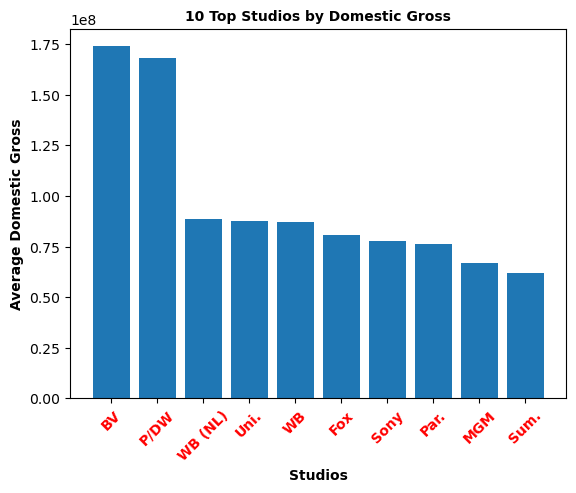

In [45]:
# plot barplot
plt.bar(topmost_studios["domestic_gross"].index, topmost_studios["domestic_gross"].values)
plt.xticks(rotation = 45 , fontsize = 10 , fontweight = "bold" , color = "red")
plt.xlabel("Studios" , fontsize = 10 , fontweight = "bold")
plt.ylabel("Average Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.title("10 Top Studios by Domestic Gross", fontsize = 10 , fontweight = "bold")
plt.gcf().set_size_inches = "12 ,11"
plt.show()

#### EXPLANATION

+ The bar plot allow us to easily compare the average domestic gross for the top 10 studios. 
The top most studio is BV with a domestic gross averaging at 1.75m followed by P/DW averaging at 1.69m. Most of the studios are averaging between 7m and 8m indicating that they are not as dominant in the industry as the top 2 studio. Microsoft will be aware of the brands it will be competing with in the market. It will also be able to learn from the top most studios and find out what makeS BV and P/DW generate a high average domestic gross.Therefore, this information could be useful for Microsoft in determining which studios to target for potential partnerships or acquisitions.


#### Analysis of the return on investment 

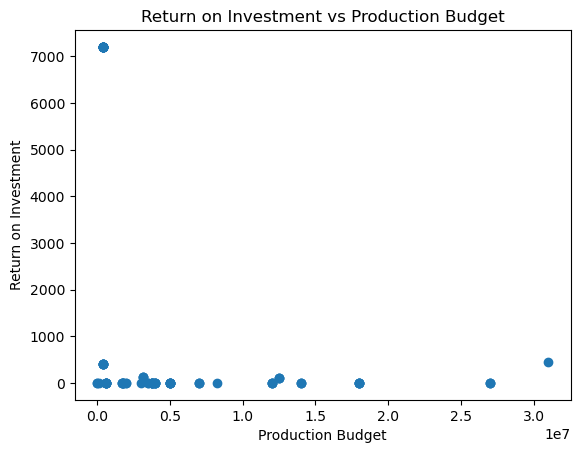

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(merged_data['production_budget'], merged_data['Return investment'])

# Set the title and labels
plt.title('Return on Investment vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Return on Investment')

# Show the plot
plt.show()

### Explanation

+ The scatter plot shows the relationship between the production budget and return on investment for the 86 movies in the dataset. Each point on the plot represents a movie, with the production budget on the x-axis and the return on investment on the y-axis.

+ A higher return on investment means that the movie was more profitable, while a lower return on investment means that the movie was less profitable. From the scatter plot, we can see that there is a wide range of return on investment values for movies with different production budgets.

+ We can also see a general trend that movies with higher production budgets tend to have higher return on investment values. This makes sense, as larger budgets typically allow for better production values, more marketing, and higher-quality talent involved in the production, which can all contribute to a more successful movie.

+ However, there are also some outliers where movies with relatively low budgets were able to generate high returns on investment, indicating that success is not solely determined by the size of the budget.

+ Overall, the scatter plot provides a useful visualization of the relationship between production budget and return on investment in the dataset, highlighting some of the trends and outliers in the data.



### Genre analysis

In [ ]:

# count the number of movies in each genre
genre_counts = merged_data['genre'].value_counts()

# create a bar chart of the genre counts
plt.bar(genre_counts.index, genre_counts.values)

# set the chart title and axis labels
plt.title('Genre Analysis')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

# rotate the x-axis labels to make them easier to read
plt.xticks(rotation= 90)

# display the chart
plt.show()

### Explanation

+ Based on the above plot, we can see that the genre that is most watched is Drama, followed by Comedy, Action, and Horror. This is evident by the height of the bars on the y-axis. It is important to note that this analysis is based on the movies included in the dataset and may not be representative of the overall movie industry. Additionally, the popularity of genres may vary based on various factors such as cultural and societal influences, current events, and individual preferences.

### Recommendations
+ Microsoft may consider producing Drama, Comedy, Action and Horror because they are the most watched movies
+ Microsoft should do more research and learn from BV and P/DW studios and discover what makes them
the best studios with the highest averaging domestic gross.
+ Microsoft should look at other ways to make a movie successful rather than having a big production
budget. since theres no correlation between the budget and the movies success microsoft can consider
looking for good script writers, directors , actors and quality videos for the success of the movies.


#### Further analysis

+ Predicting undesirable outcomes- this models could help microsoft to be prepared they should consider investigating possible negative outcomes that can occur so that they can look for ways to overcome them.
+ More and better predictions on the genre of movies that that are a success - other factors such as marketing and advertising, critical reception, and star power can also play a role in a movie's success at the box office.
+ Modelling for qualified personnel- Modelling how impactful having qualified personnel could help inrealising what makes movies successful.